In [1]:
import pandas as pd
import numpy as np
import sklearn_crfsuite
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

df = pd.read_csv('C:/Users/Rasmu/Downloads/ner_dataset.csv', encoding = "ISO-8859-1", error_bad_lines=False)
df = df[:100000]
df = df.fillna(method='ffill')
df.head()

C:\Users\Rasmu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


In [2]:
df['Sentence #'].nunique(), df.Word.nunique(), df.Tag.nunique()
df.groupby('Tag').size().reset_index(name='counts')

,Tag,counts
0,B-art,75
1,B-eve,53
2,B-geo,3303
3,B-gpe,1740
4,B-nat,30
5,B-org,1876
6,B-per,1668
7,B-tim,1823
8,I-art,43
9,I-eve,47


In [3]:
X = df.drop('Tag', axis=1)
v = DictVectorizer(sparse=False)
X = v.fit_transform(X.to_dict('records'))
y = df.Tag.values
classes = np.unique(y)
classes = classes.tolist()
new_classes = classes.copy()
new_classes.pop()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=0)
X_train.shape, y_train.shape

((67000, 15507), (67000,))

In [4]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels = new_classes))

              precision    recall  f1-score   support

       B-art       0.00      0.00      0.00        24
       B-eve       0.00      0.00      0.00        19
       B-geo       0.50      0.94      0.65      1085
       B-gpe       0.92      0.71      0.80       556
       B-nat       0.00      0.00      0.00        12
       B-org       0.58      0.39      0.47       589
       B-per       0.72      0.45      0.55       564
       B-tim       0.89      0.68      0.77       611
       I-art       0.00      0.00      0.00        12
       I-eve       0.00      0.00      0.00        18
       I-geo       0.84      0.20      0.33       230
       I-gpe       0.00      0.00      0.00        14
       I-nat       0.00      0.00      0.00         2
       I-org       0.67      0.42      0.51       445
       I-per       0.60      0.63      0.62       591
       I-tim       1.00      0.02      0.03       194

   micro avg       0.63      0.59      0.61      4966
   macro avg       0.42   

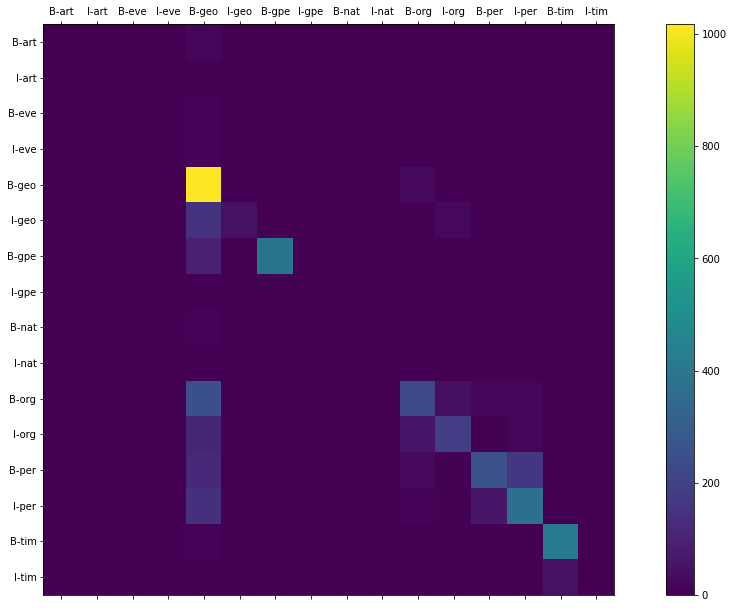

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

sortedLabels = ['B-art','I-art','B-eve','I-eve','B-geo','I-geo','B-gpe','I-gpe','B-nat','I-nat','B-org','I-org','B-per','I-per','B-tim','I-tim']
cm = confusion_matrix(y_test, y_pred, labels=sortedLabels)

fig = plt.figure( figsize=[18.5,10.5])
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
fig.colorbar(cax)
ax.set_xticklabels(sortedLabels)
ax.set_yticklabels(sortedLabels)

ax = plt.xticks(np.arange(0, 16))
ax = plt.yticks(np.arange(0, 16))
